In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.colors as mcolors

import random
import re   
import string                          

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [28]:
# Load Data
data = pd.read_csv('final_merged_ML.csv')

In [7]:
data.head()

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_PERSON,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'game': 0.6107402745180438, 'hurt': 0.7918309...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'right': 0.27278835247077626, 'don': 0.226821...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.7044442094807741, 'near': 0.70975...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,0.0,1.0,1.0,0.0,0.0,0,1,1,0,0
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.18498978995980117, 'considering': ...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [8]:
def clean_text(sentence):
    text = str(sentence).lower().strip()
    text = re.sub(r'[^a-zA-Z ]', '', sentence)  # Remove special characters
    return text

In [9]:
data['sentence'] = data['sentence'].astype(str)

In [10]:
data['clean_sentence'] = data['sentence'].apply(clean_text)

In [11]:
data.head()

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP,clean_sentence
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'game': 0.6107402745180438, 'hurt': 0.7918309...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,That game hurt
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'right': 0.27278835247077626, 'don': 0.226821...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,You do right if you dont care then fuck em
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Man I love reddit
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.7044442094807741, 'near': 0.70975...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,1.0,1.0,0.0,0.0,0,1,1,0,0,Etenia was nowhere near them he was by the Falcon
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.18498978995980117, 'considering': ...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Right Considering its such an important docume...


In [12]:
# Feature Extraction using TF-IDF with bigrams and trigrams
vectorizer = TfidfVectorizer(ngram_range=(1,3))  # Unigrams, Bigrams, Trigrams
X = vectorizer.fit_transform(data["clean_sentence"])
y = data['emotion']

In [13]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# Adjusting class weights instead of using external libraries
log_reg = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [15]:
# Make predictions
y_pred_log = log_reg.predict(X_test)

In [16]:
log_f1 = f1_score(y_test, y_pred_log, average='weighted')

In [17]:
print("Logistic Regression F1-score:", log_f1)

Logistic Regression F1-score: 0.5181707927208569


In [18]:
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", log_accuracy)

Accuracy: 0.5098339562526806


In [19]:
log_precision = precision_score(y_test, y_pred_log, average='weighted')
print("Precision:", log_precision)

Precision: 0.5312982446509641


In [20]:
log_recall = recall_score(y_test, y_pred_log, average='weighted')
print("Recall:", log_recall)

Recall: 0.5098339562526806


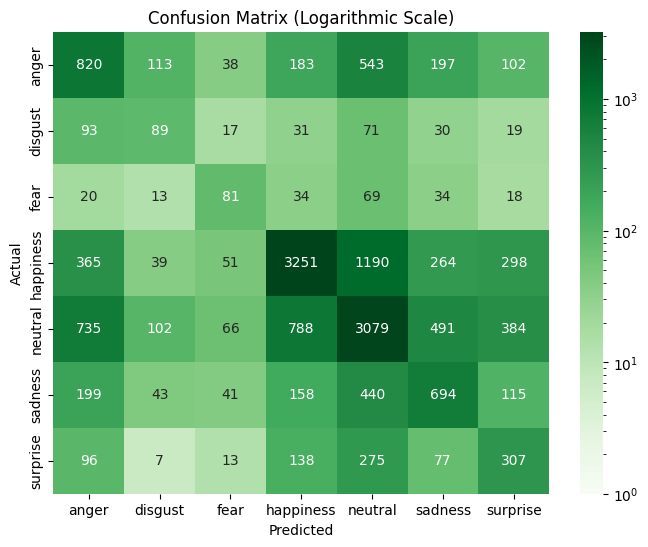

In [33]:
cm = confusion_matrix(y_test, y_pred_log, labels=emotion_labels)

plt.figure(figsize=(8, 6))

# Use LogNorm to apply a logarithmic scale to the color distribution
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Greens', 
            xticklabels=emotion_labels, 
            yticklabels=emotion_labels,
            norm=mcolors.LogNorm(vmin=1, vmax=cm.max()))

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logarithmic Scale)")
plt.show()